## 2.3.1 예제에 사용할 데이터셋

In [1]:
# 두개의 특성을 가진 forge 데이터셋 이요
#x측: 첫번째 특성, y 축: 두번째 특성

X.shape: (26, 2)


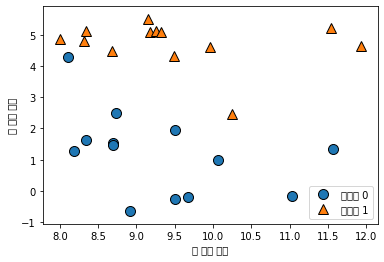

In [4]:
#데이터셋을 만듭니다.
import matplotlib.pyplot as plt
import mglearn.datasets

X,y=mglearn.datasets.make_forge()

#산점도를 만듭니다.
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:", X.shape)

In [5]:
## wave 데이터셋 사용 -입력 특성 하나, 모델링할 타깃변수를 가진다.
## x축-특성, y축-회귀의 타깃

Text(0, 0.5, '타깃')

c:\users\jpc10\ideaprojects\untitled\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\jpc10\ideaprojects\untitled\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44611 (\N{HANGUL SYLLABLE GIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


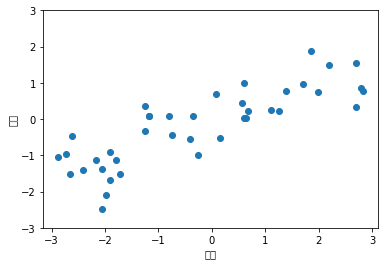

In [6]:
X,y= mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")